K=1, Accuracy=0.967
K=3, Accuracy=0.933
K=5, Accuracy=0.933
K=7, Accuracy=0.967
K=9, Accuracy=0.967
K=11, Accuracy=0.967


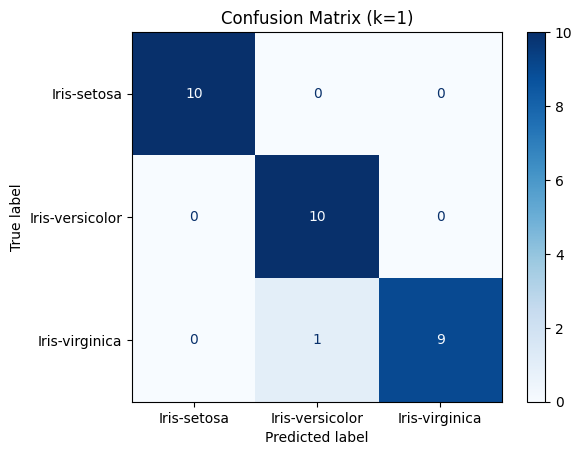

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

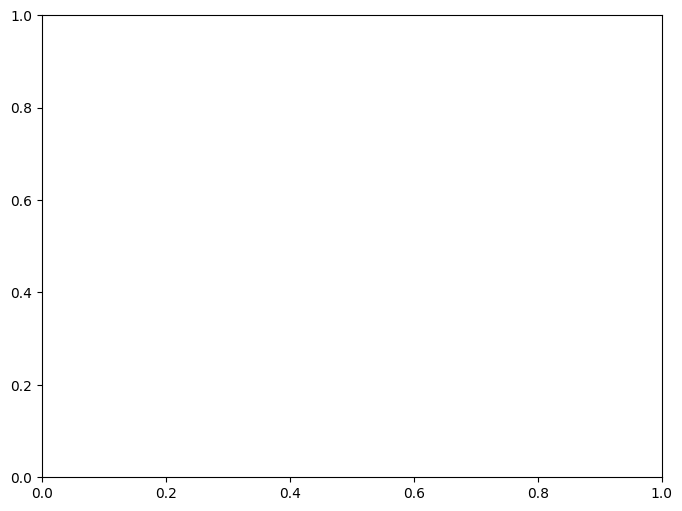

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# 1. Load dataset
df = pd.read_csv("Iris.csv")
X = df.drop(columns=["Id", "Species"])
y = df["Species"]


# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# 2 & 3. Train KNN with different k values
k_values = [1, 3, 5, 7, 9, 11]
accuracies = []


for k in k_values:
         knn = KNeighborsClassifier(n_neighbors=k)
         knn.fit(X_train, y_train)
         y_pred = knn.predict(X_test)
         acc = accuracy_score(y_test, y_pred)
         accuracies.append(acc)
         print(f"K={k}, Accuracy={acc:.3f}")


# 4. Confusion matrix for best k
best_k = k_values[np.argmax(accuracies)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)


cm = confusion_matrix(y_test, y_pred_best, labels=knn_best.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_).plot(cmap="Blues")
plt.title(f"Confusion Matrix (k={best_k})")
plt.show()


# 5. Visualize decision boundaries (using 2 features for 2D)
from matplotlib.colors import ListedColormap


X_plot = X_scaled[:, :2] # only first two features for visualization
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y, test_size=0.2, random_state=42, stratify=y)


knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_plot, y_train_plot)


# create mesh grid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
np.arange(y_min, y_max, 0.02))


Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# plot decision boundaries
plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
sns.scatterplot(x=X_train_plot[:, 0], y=X_train_plot[:, 1], hue=y_train_plot,
palette=cmap_bold.colors, edgecolor='k')
plt.title(f"Decision Boundary with K={best_k} (First 2 Features)")
plt.xlabel("Feature 1 (normalized)")
plt.ylabel("Feature 2 (normalized)")
plt.show()